In [1]:
from serpentTools.settings import rc
from xsInterface.functions.main import Main
from xsInterface.functions.dyn3d import DYN3D
from pathlib import Path
import yaml
from string import Template
import numpy as np
rc['serpentVersion'] = '2.1.32'

In [3]:
# ---------------------------------
#    Setup xs-interface files
# ---------------------------------

# First load the unique assembly keys from the adjacent .yaml file
coreDataPath = str(Path('./coreData.yaml'))
with open(coreDataPath, 'r') as f:
    coreData = yaml.safe_load(f)

# Now make a mapping of assembly types in the serpent database to the unique assemblies in the core model
# Currently just mapping everything to assyw0i0e3-000, i.e. a uniform 3% enriched core
initialMapping = {}
for assyKey in coreData['keys']:
    initialMapping.update({assyKey: 'assyw0i0e3-000'})

# Read the univs file template
univs_template_path = Path('./inputs/univ_files/univs_template')
with open(str(univs_template_path), 'r') as f:
    templateLines = f.read()

# Now set the file names in the corresponding univs files
for assyKey, assyType in initialMapping.items():
    with open(str( univs_template_path.parent / f"univs{assyKey}" ), 'w') as f:
        f.write(Template(templateLines).substitute(assemblyType = assyType))

indexMap, coreMap = coreData['indexmap'], coreData['coremap']
coreMap = [[int(chanID) for chanID in row.split()] for row in coreMap.split('\n')]
indexMap = [[int(index) for index in row.split()] for row in indexMap.split('\n')]
mapping = []

for i, row in enumerate(indexMap):
    for j, mapIndex in enumerate(row):
        assemblyTypeIndex = coreMap[i][j]
        mapping.append([str(mapIndex), coreData['keys'][assemblyTypeIndex-1] + '0'])

# Now, template the controlDict
control_dict_template_path = Path('./inputs/controlDictTemplate')

# Now write the assembly-channel identifications using the core map
with open(str(control_dict_template_path), 'r') as f:
    # Convert channel mapping to a string to be fed to the template
    templateLines = f.read()
    channelsMap = '\n'.join([f"{map[0]}  {map[1]}" for map in mapping])

    # Set all volumes to be the same = 20
    volume = 20
    volumesMap = '\n'.join([f"{map[0]}  {volume}" for map in mapping])

# Now write to controlDict

with open(str(control_dict_template_path.parent / "controlDict"), 'w') as f:
    f.write(Template(templateLines).substitute(channelsMapping = channelsMap,
                                                volumesMapping = volumesMap))


# Now read controlDict and write XS
controlDict = str(Path("./inputs/controlDict")) # --> see definition of controlDict in separate file
xs = Main(controlDict)  # Read control dict
xs.Read(readTemplate=True) # Read xs data and templates and populate data
xs.Write() # Write data to txt files

SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading control dict ...
<inputs/controlDict>

... Reading universe <48C2> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <48C3> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49A1> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49B1> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49B2> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49B3> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49B4> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49B5> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49C1> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49C3> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49C5> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49C6> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <49C7> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50A1> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50A2> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50B1> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50B2> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50B3> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50B4> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50B5> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50C1> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50C2> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <50C4> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <XXXX> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


SERPENT Serpent 2.2.1 found in ./serpent/assyw0i0e3-000_res.m, but version 2.1.32 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


... Reading universe <REFA> ...
... Reading coe/_res.m file for hisotry <his_nom> ...


In [4]:
casedir = str(Path("./dyn3d"))
casefile = "core2D"
exefile = "./RUN_DYN3D.sh"

reslt = DYN3D(xs, casedir, casefile, exefile)
              
# nchs = 257
# states = {
# 'time': [[0, 10]*1]*25
# }
# xs.PopulateCoreData(attributes=None,
#                     states=states,
#                     volManip={'infflx': 'divide'},
#                     sph=None, adf=None)
xs.core.ng = 2 # Have to set this manually for some reason?

reslt.Execute()

... DYN3D Execution ... Start
... DYN3D Execution ... Ended Successfully


In [5]:

chid = '1'
iters = None
# reslt.PlotFluxes(x_values, iters, chid)
reslt.flux
# reslt.GetChannelFlux('1')


[array([[3.55627549e-04, 6.96865544e-05]]),
 array([[3.12458887e-04, 6.10528220e-05]]),
 array([[0.00409074, 0.0008202 ]]),
 array([[0.00302181, 0.00060642]]),
 array([[0.00188914, 0.00037824]]),
 array([[0.00073181, 0.00014492]]),
 array([[0.00079554, 0.00015787]]),
 array([[0.00204126, 0.00040907]]),
 array([[0.00324793, 0.00064959]]),
 array([[0.00435798, 0.00087365]]),
 array([[0.00536525, 0.00107305]]),
 array([[0.00616695, 0.0012375 ]]),
 array([[0.0006907 , 0.00013711]]),
 array([[0.00678365, 0.00136084]]),
 array([[0.00717422, 0.0014369 ]]),
 array([[0.00729756, 0.00146157]]),
 array([[0.00717422, 0.0014369 ]]),
 array([[0.00678365, 0.00136084]]),
 array([[0.00616695, 0.0012375 ]]),
 array([[0.00536525, 0.00107305]]),
 array([[0.00435798, 0.00087365]]),
 array([[0.00324793, 0.00064959]]),
 array([[0.00204126, 0.00040907]]),
 array([[0.00120461, 0.00024051]]),
 array([[0.00079554, 0.00015787]]),
 array([[0.00081609, 0.00016178]]),
 array([[0.00209676, 0.00041935]]),
 array([[0.0

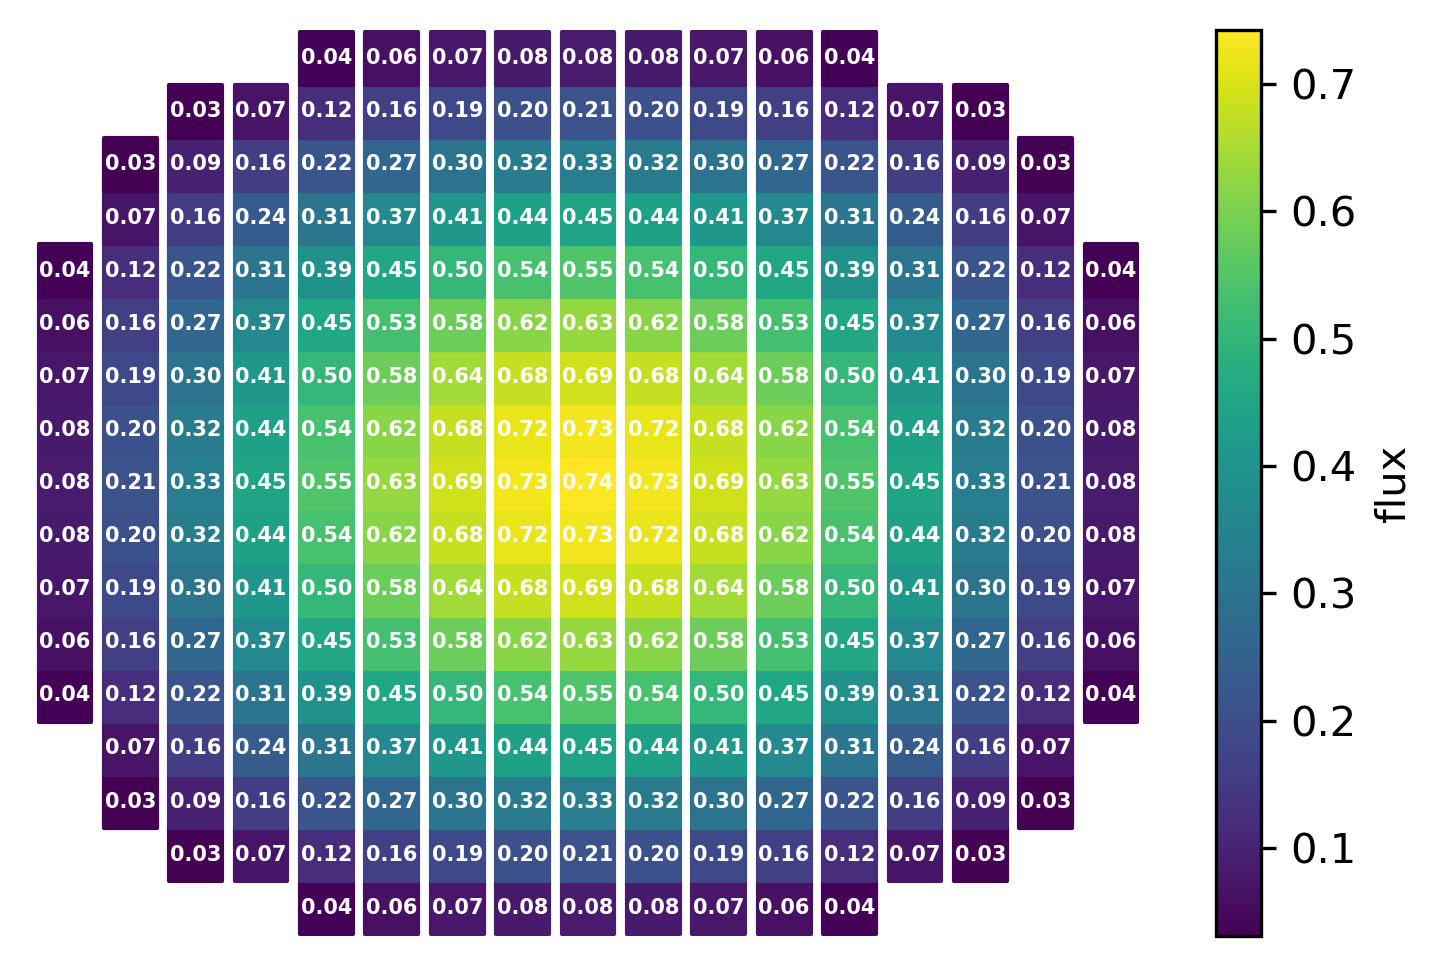

In [6]:
resxs = reslt.xs
resxs.SlicePlot(reslt.flux, layer=0, markersize=160, spacesize=60.0,
         textsize=5, textcolor='w', textweight="bold", precision=".2f", 
         edge=2.0, norm=0.01, label="flux")